# Import necessary libraries

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from warnings import filterwarnings

# Ignore warnings
filterwarnings('ignore')

In [6]:
# Load the dataset
df = pd.read_csv(r"C:\Users\dell\Downloads\Data Science and Artificial Intelligence Projects\Crop Yield Analysis\crop_yield.csv")

In [7]:
# Display the first few rows of the dataframe
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [8]:
# Display information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [9]:
# Display summary statistics of the dataframe
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [10]:
# Display the data types of the dataframe columns
df.dtypes

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

In [11]:
# Display the shape of the dataframe
df.shape

(19689, 10)

In [12]:
# Check for missing values
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [13]:
# Display the column names
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

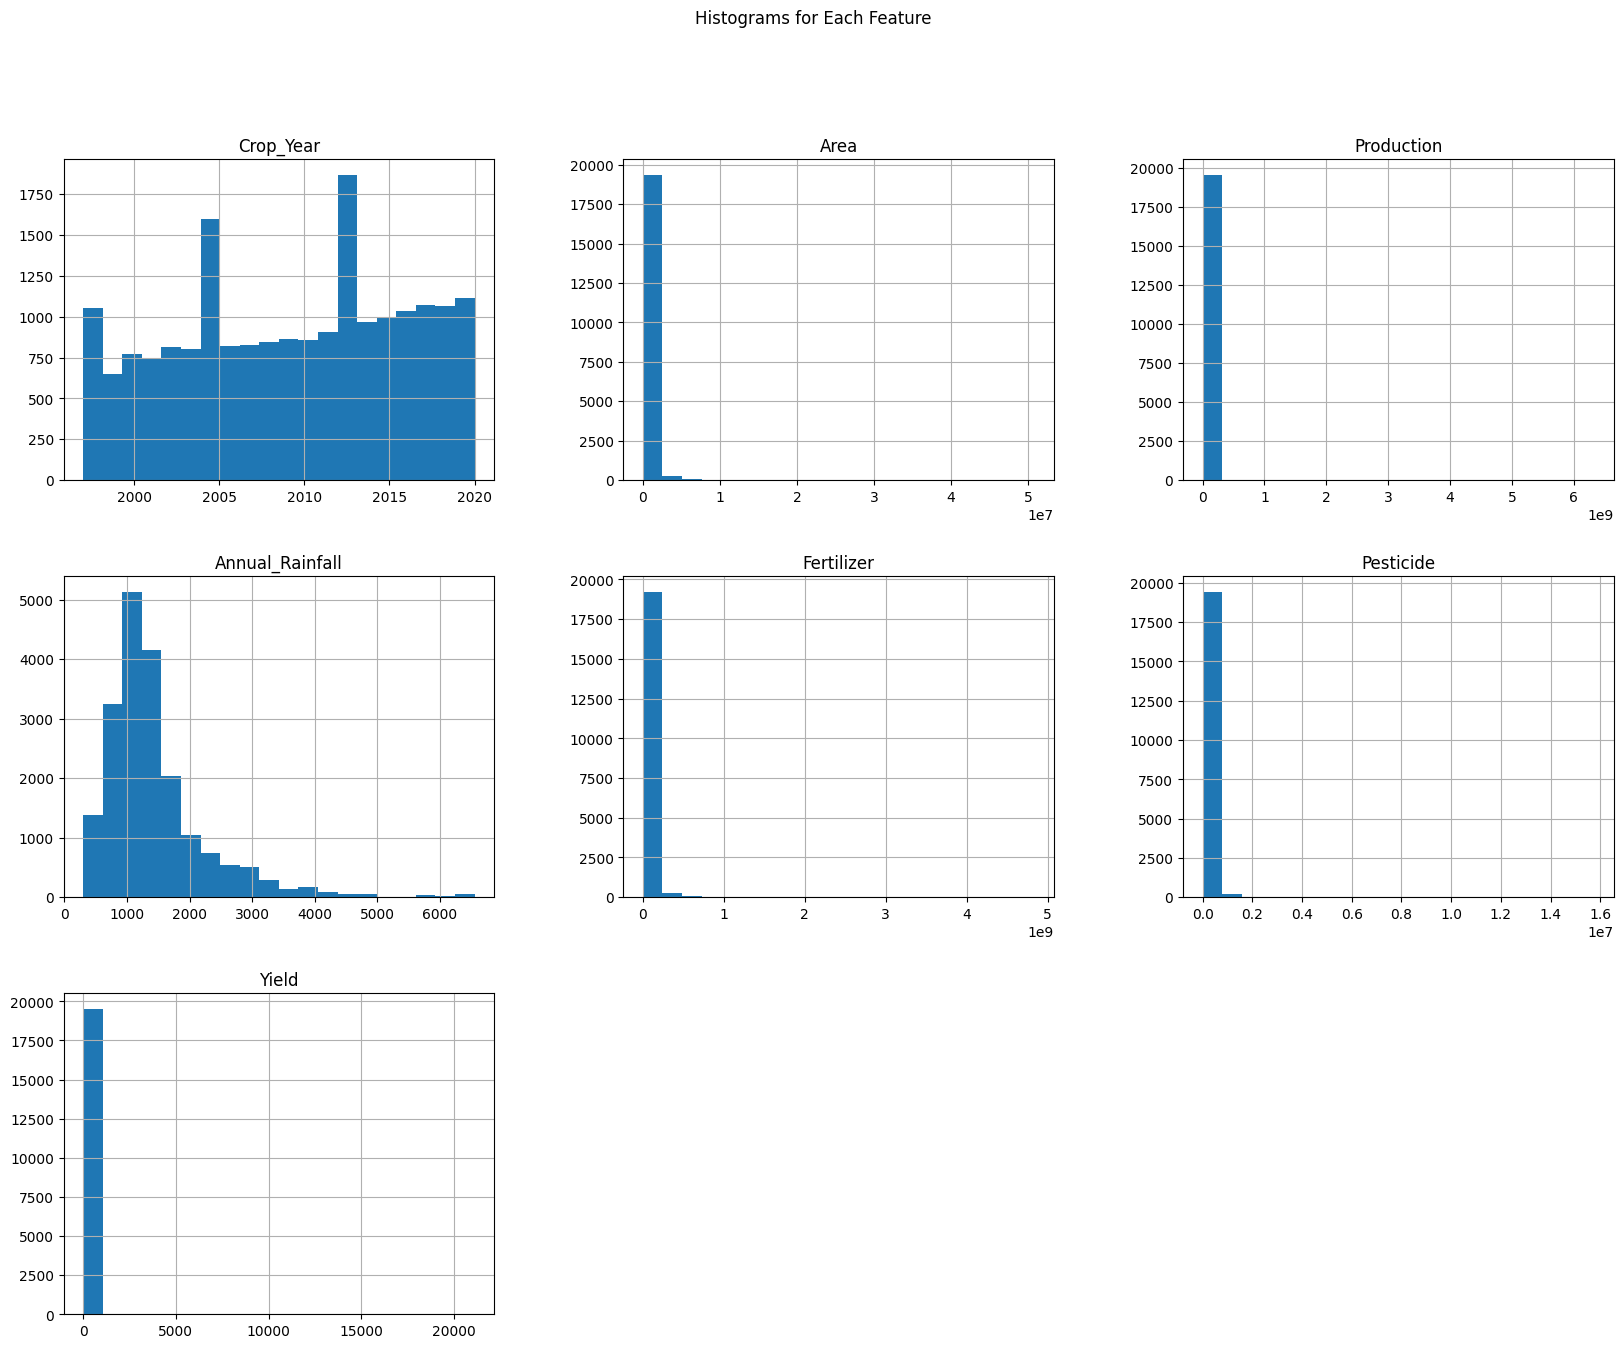

In [14]:
# Plot histograms for each feature
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms for Each Feature')
plt.show()

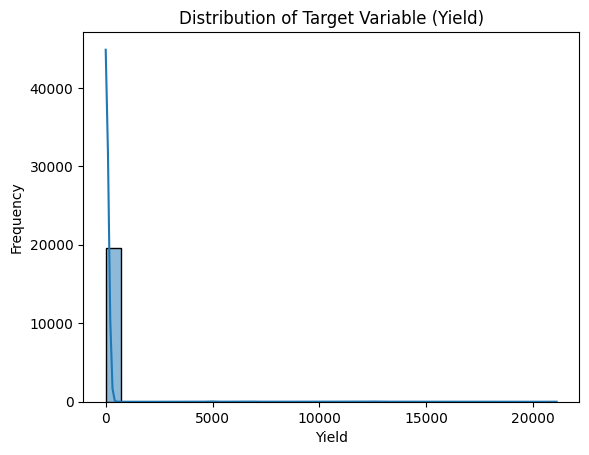

In [15]:
# Check the distribution of the target variable (Yield)plt.figure(figsize=(10, 6))
sns.histplot(df['Yield'], bins=30, kde=True)
plt.title('Distribution of Target Variable (Yield)')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()

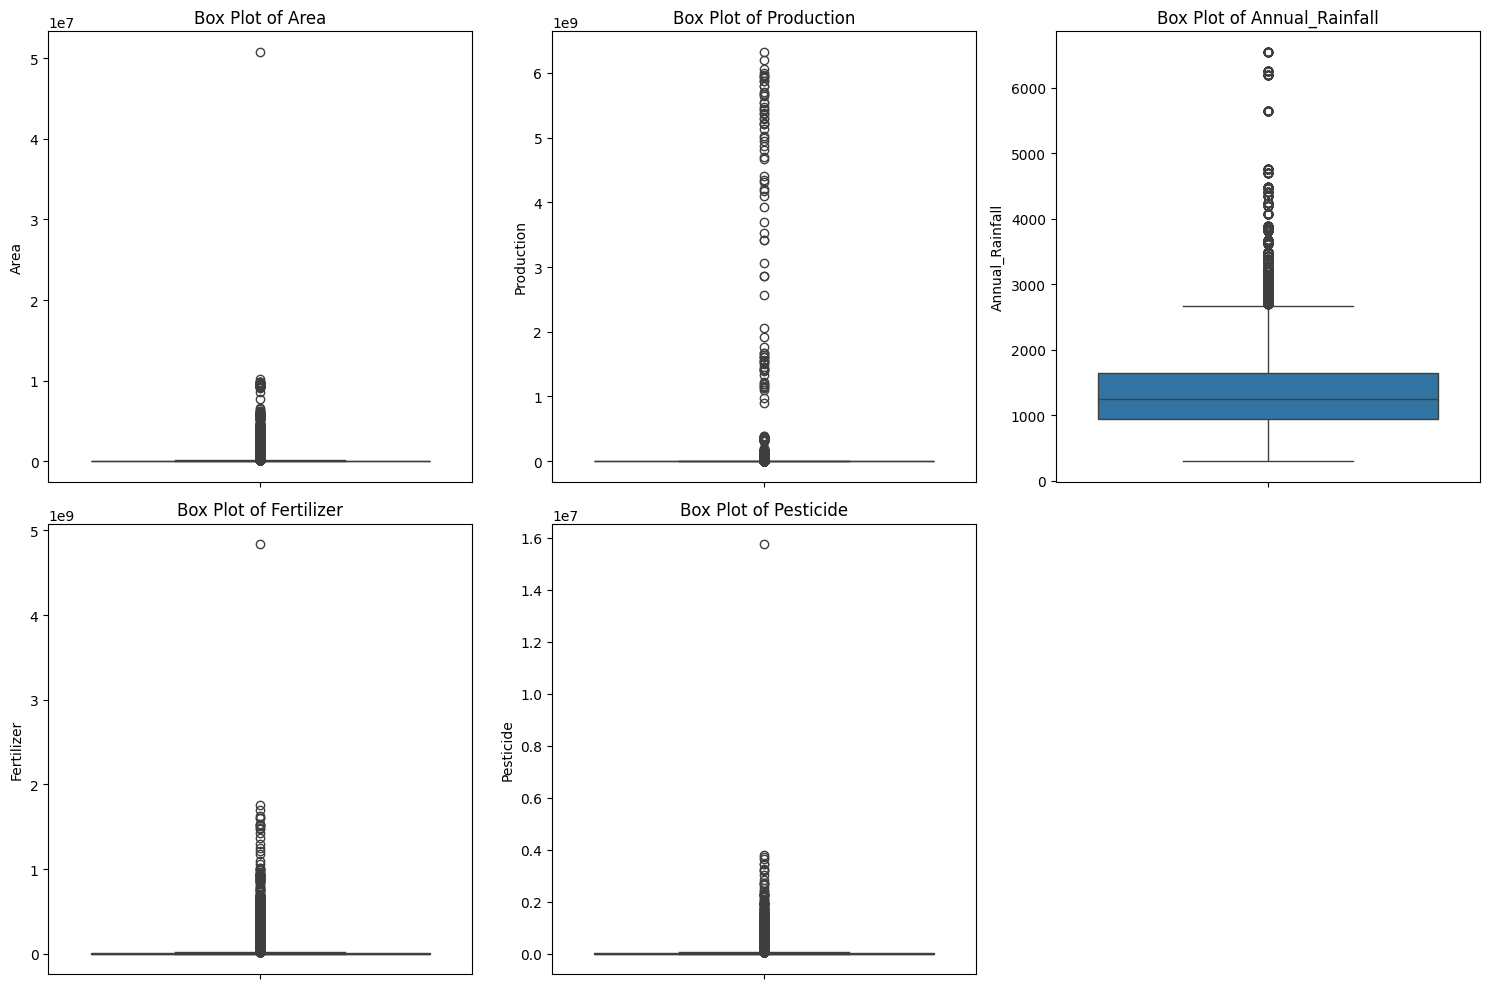

In [16]:
# Box plots for each numeric feature
plt.figure(figsize=(15, 10))
numeric_features = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

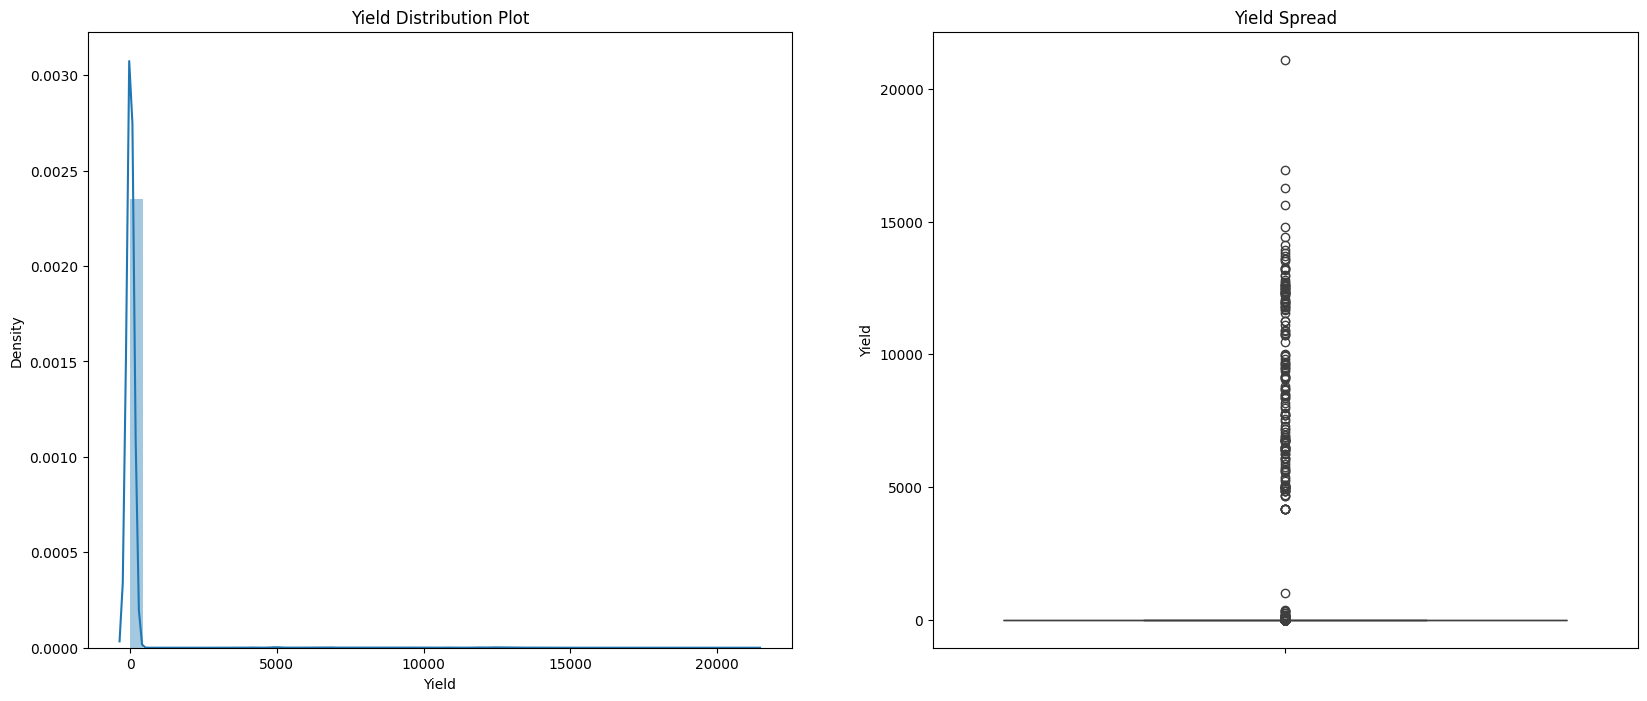

In [17]:
# Yield distribution and box plot
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.title('Yield Distribution Plot')
sns.distplot(df['Yield'])

plt.subplot(1, 2, 2)
sns.boxplot(df['Yield'])
plt.title('Yield Spread')

plt.show()

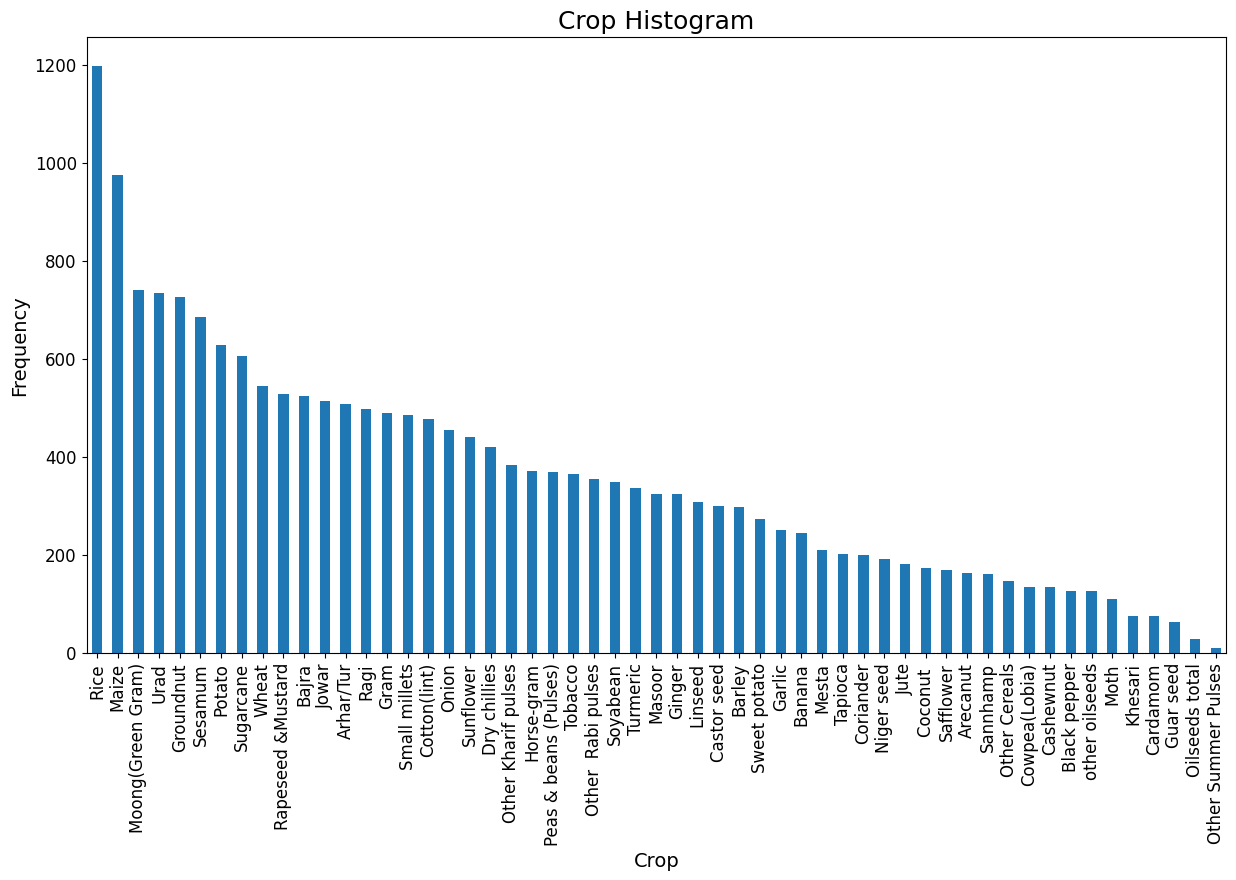

In [18]:
# Histograms for categorical features
plt.figure(figsize=(50, 8))

# Histogram for 'Crop'
plt.subplot(1, 3, 1)
plt1 = df['Crop'].value_counts().plot(kind='bar')
plt.title('Crop Histogram', fontsize=18)
plt1.set(xlabel='Crop', ylabel='Frequency of Crop')
plt1.set_xlabel('Crop', fontsize=14)
plt1.set_ylabel('Frequency', fontsize=14)
plt1.tick_params(axis='x', labelsize=12)
plt1.tick_params(axis='y', labelsize=12)

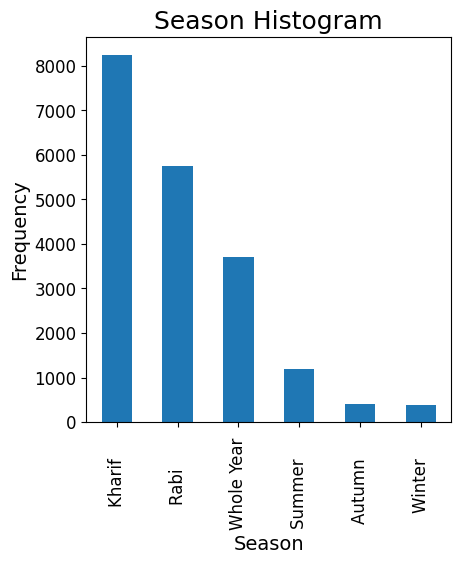

In [19]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 2)
plt2 = df['Season'].value_counts().plot(kind='bar')
plt.title('Season Histogram', fontsize=18)
plt2.set(xlabel='Season', ylabel='Frequency of Season')
plt2.set_xlabel('Season', fontsize=14)
plt2.set_ylabel('Frequency', fontsize=14)
plt2.tick_params(axis='x', labelsize=12)
plt2.tick_params(axis='y', labelsize=12)

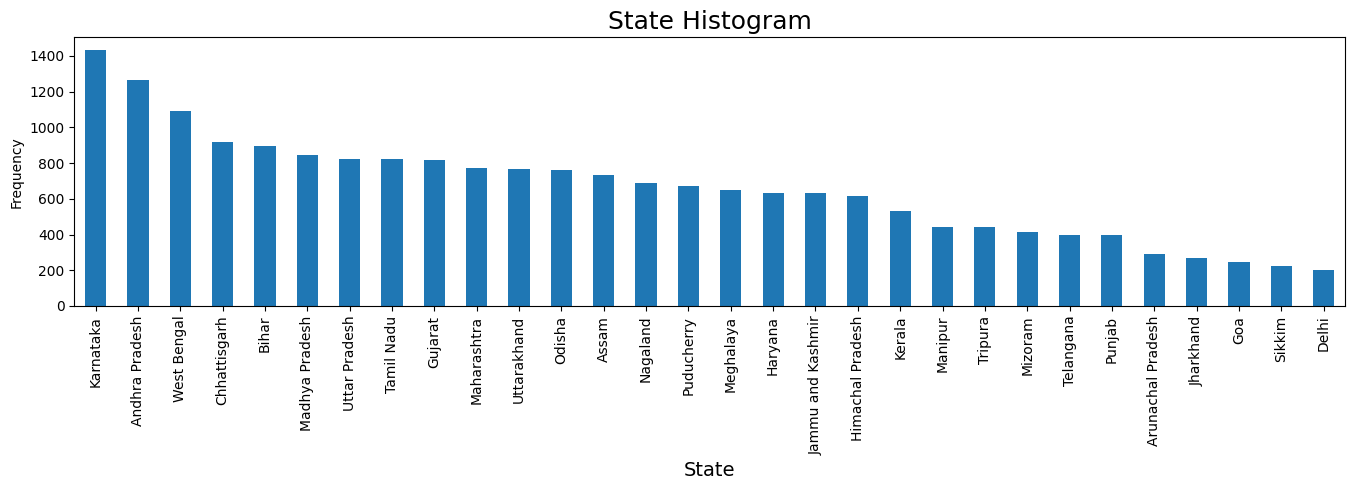

In [20]:
# Histogram for 'State'
plt.figure(figsize=(40, 5))
plt.subplot(1, 3, 3)
plt3 = df['State'].value_counts().plot(kind='bar')
plt.title('State Histogram', fontsize=18)
plt3.set(xlabel='State', ylabel='Frequency of State')
plt3.set_xlabel('State', fontsize=14)
plt3.set_ylabel('Frequency', fontsize=10)
plt3.tick_params(axis='x', labelsize=10)
plt3.tick_params(axis='y', labelsize=10)
plt.tight_layout()
plt.show()

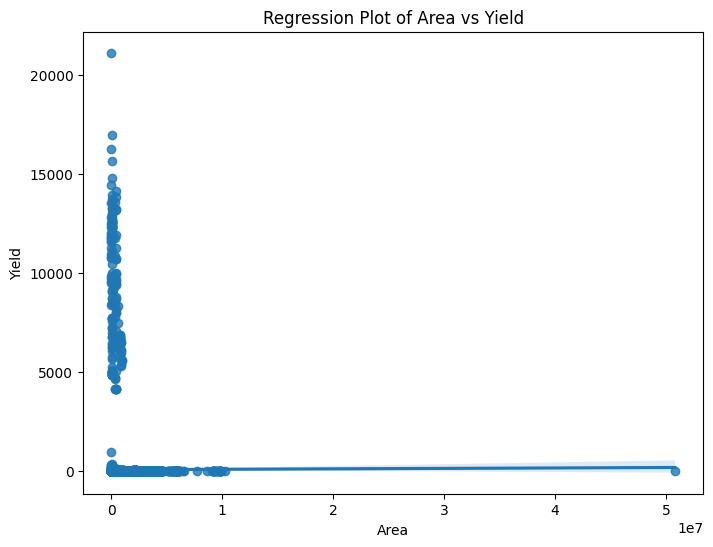

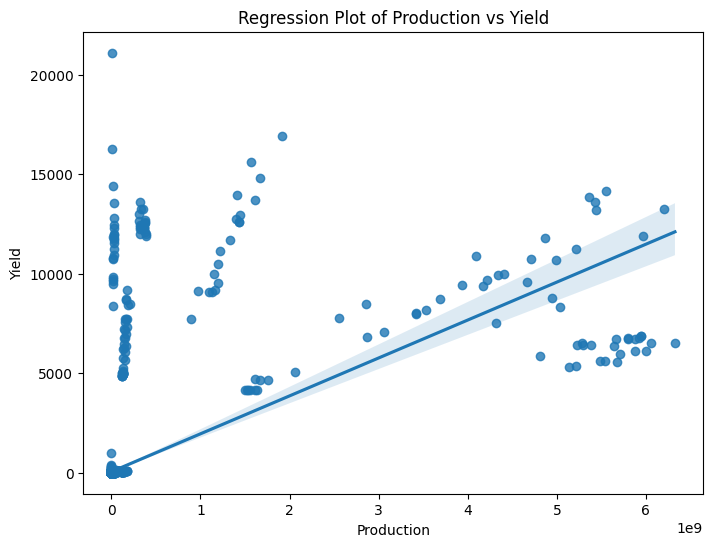

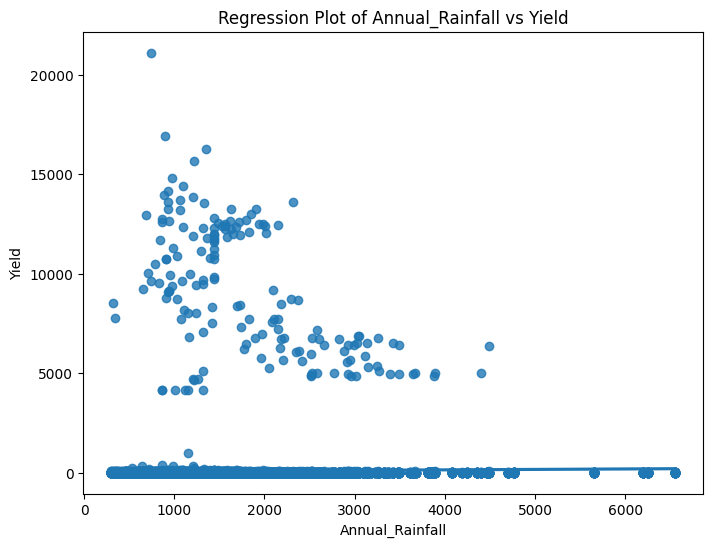

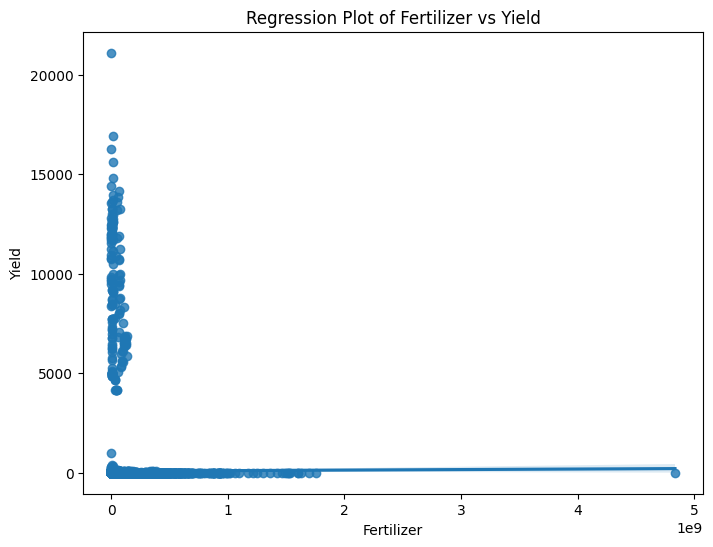

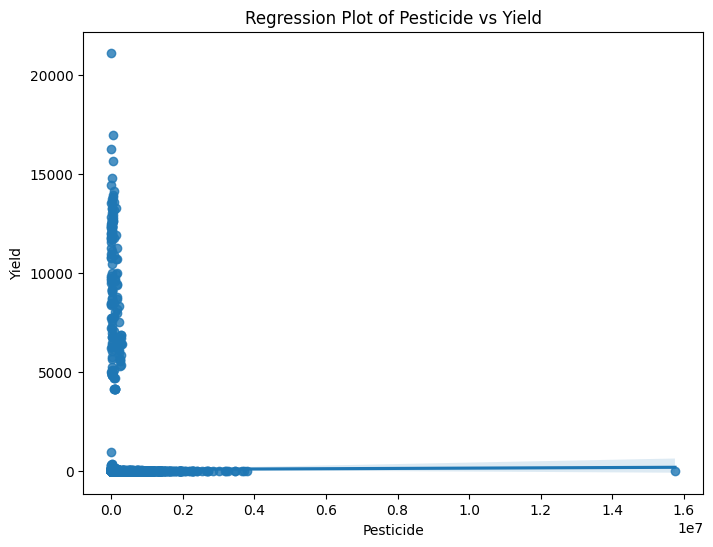

In [21]:
# Regression plots to visualize relationship between numeric features and the target
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=feature, y='Yield', data=df)
    plt.title(f'Regression Plot of {feature} vs Yield')
    plt.xlabel(feature)
    plt.ylabel('Yield')
    plt.show()

In [22]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Crop', 'Season', 'State'], drop_first=True)

In [23]:
# Split the data into features and target variable
X = df.drop('Yield', axis=1)
y = df['Yield']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Initialize and train the Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
# Evaluate the model on the test set
print("Model Score on Test Set:", model.score(X_test, y_test))

Model Score on Test Set: 0.9837053070956995


In [28]:
# Make predictions and evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
# Calculate and print performance metrics
print("Training Mean Squared Error:", mean_squared_error(y_train, y_pred_train))
print("Training R-squared Score:", r2_score(y_train, y_pred_train))
print("Testing Mean Squared Error:", mean_squared_error(y_test, y_pred_test))
print("Testing R-squared Score:", r2_score(y_test, y_pred_test))

Training Mean Squared Error: 5253.758854298011
Training R-squared Score: 0.9931226107569354
Testing Mean Squared Error: 13055.95754136205
Testing R-squared Score: 0.9837053070956995


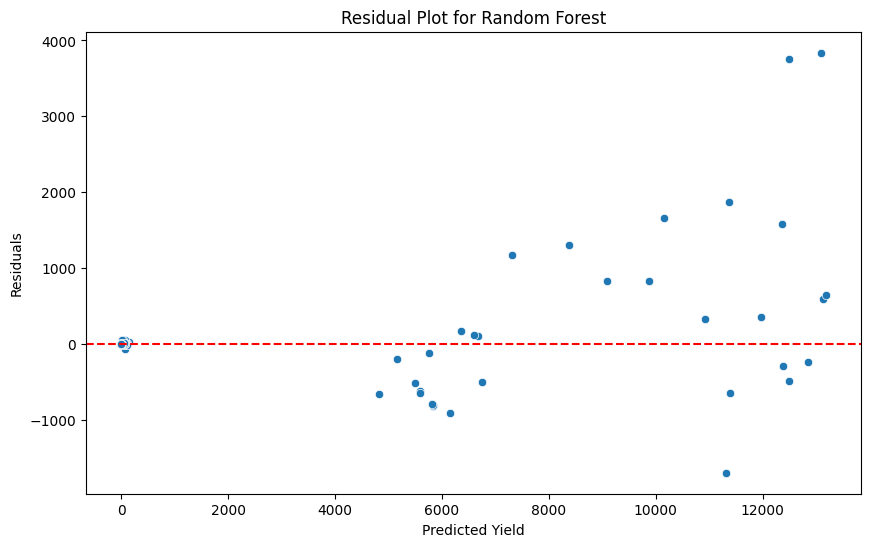

In [29]:
# Residual Plot for Random Forest
residuals = y_test - y_pred_test

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Random Forest')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.show()

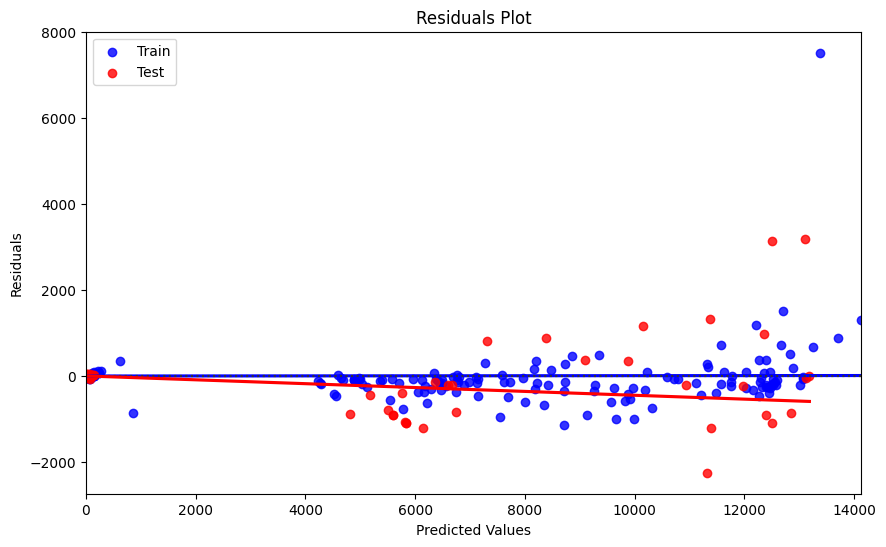

In [30]:
# Residual analysis
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_train_pred, y=train_residuals, lowess=True, color='blue', label='Train')
sns.residplot(x=y_test_pred, y=test_residuals, lowess=True, color='red', label='Test')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()